Autor: Oriol Dellà i Soler

In [56]:
# Importem les llibreries
import numpy as np 
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import shapiro, levene

In [3]:
# Importem les dades

df = pd.read_csv("winequality-red.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


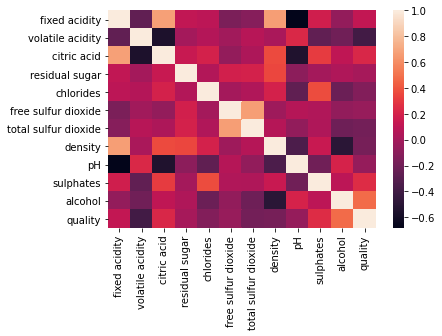

In [6]:
# Analitzem les correlacions entre variables:

corr = df.corr()
sns.heatmap(corr)
corr

In [7]:
# Busquem valors nuls
df.isnull().values.any()

False

In [8]:
# Busquem valors = 0
df.eq(0).any().any()

True

In [9]:
# Analisis descriptiu de les dades
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

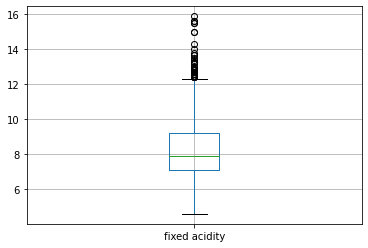

In [17]:
# Busquem outliers:
df.boxplot(column="fixed acidity")

<AxesSubplot:>

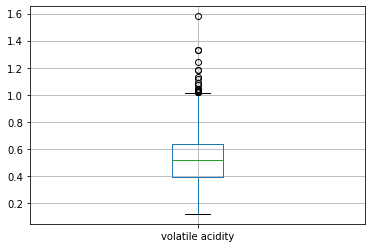

In [18]:
df.boxplot(column="volatile acidity")

<AxesSubplot:>

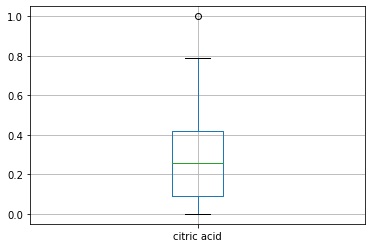

In [19]:
df.boxplot(column="citric acid")

<AxesSubplot:>

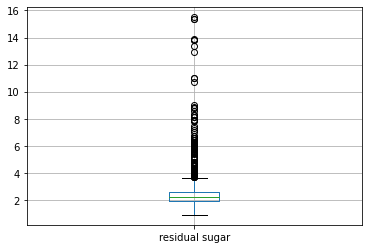

In [20]:
df.boxplot(column="residual sugar")

<AxesSubplot:>

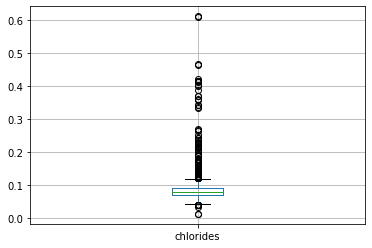

In [21]:
df.boxplot(column="chlorides")

<AxesSubplot:>

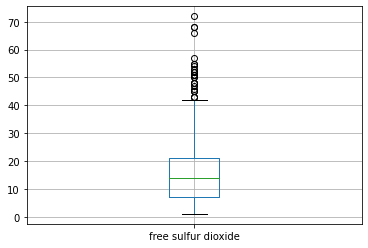

In [22]:
df.boxplot(column="free sulfur dioxide")

<AxesSubplot:>

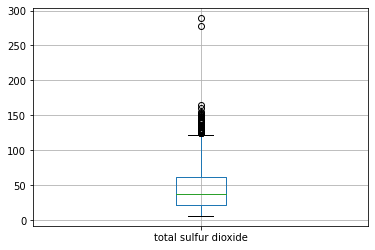

In [23]:
df.boxplot(column="total sulfur dioxide")

<AxesSubplot:>

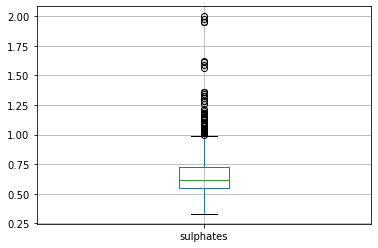

In [24]:
df.boxplot(column="sulphates")

In [25]:
# Analitzem l'outlier del gràfic de "citric acid" donat que es presenta sol

row = df.loc[df['citric acid'] == 1]
row

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


In [42]:
# Realitzem l'analisi shapiro de normalitat de les dades
for num in df.columns:
    print(num)
    stat, p = shapiro(df[num])
    print('Statistics=%.3f, p=%.10f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Gaussià (no neguem H0)\n')
    else:
        print('no Gaussià (neguem H0)\n')

fixed acidity
Statistics=0.942, p=0.0000000000
no Gaussià (neguem H0)

volatile acidity
Statistics=0.974, p=0.0000000000
no Gaussià (neguem H0)

citric acid
Statistics=0.955, p=0.0000000000
no Gaussià (neguem H0)

residual sugar
Statistics=0.566, p=0.0000000000
no Gaussià (neguem H0)

chlorides
Statistics=0.484, p=0.0000000000
no Gaussià (neguem H0)

free sulfur dioxide
Statistics=0.902, p=0.0000000000
no Gaussià (neguem H0)

total sulfur dioxide
Statistics=0.873, p=0.0000000000
no Gaussià (neguem H0)

density
Statistics=0.991, p=0.0000000194
no Gaussià (neguem H0)

pH
Statistics=0.993, p=0.0000017137
no Gaussià (neguem H0)

sulphates
Statistics=0.833, p=0.0000000000
no Gaussià (neguem H0)

alcohol
Statistics=0.929, p=0.0000000000
no Gaussià (neguem H0)

quality
Statistics=0.858, p=0.0000000000
no Gaussià (neguem H0)



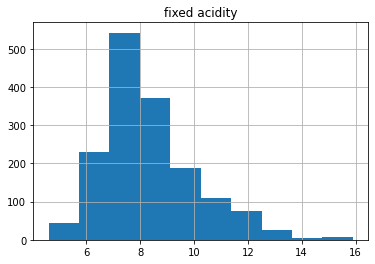

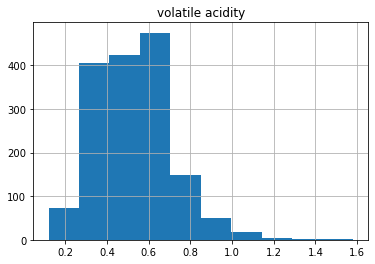

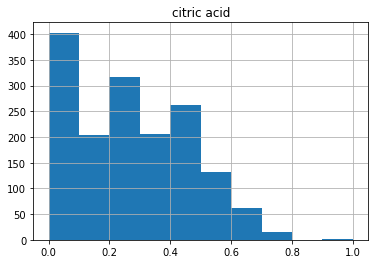

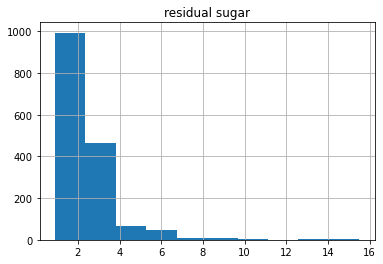

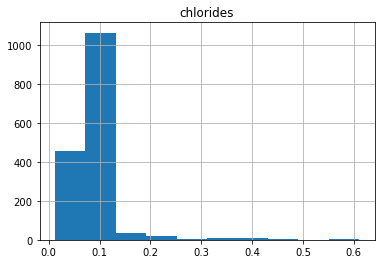

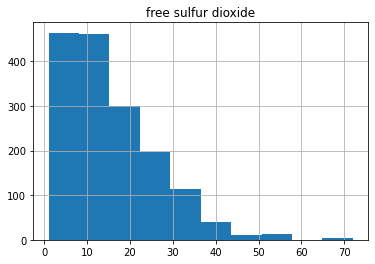

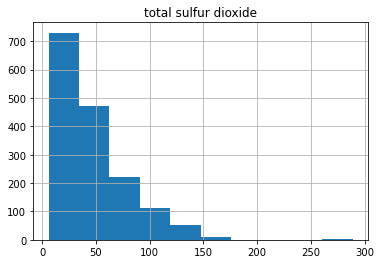

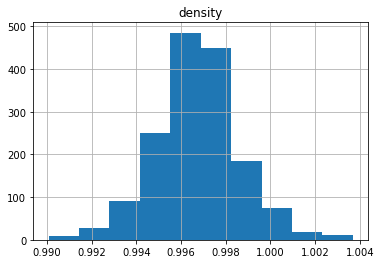

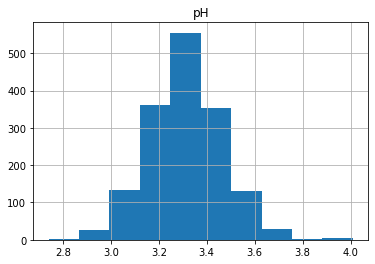

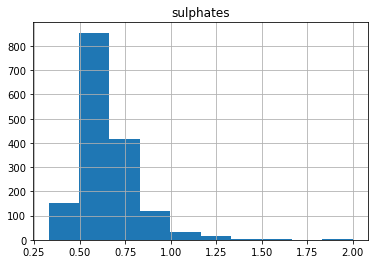

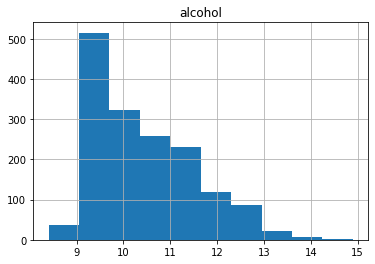

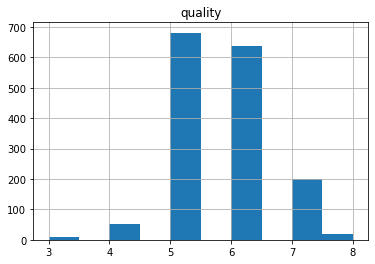

In [43]:
# Métode visual per a inspeccionar la normalitat a les dades
for num in df.columns:
    df.hist(column=num)

In [57]:
# Anàlisi de la homoscedasticitat
for num in df.columns:
    stat, p = levene(random.sample(df[num].tolist(), 30), random.sample(df[num].tolist(), 29))
    print("Valor de p per a {0}: {1}".format(num, p))
    if p > 0.05:
        print("Variància homogènia.\n")
    else:
        print("Variança irregular entre poblacions.\n")

Valor de p per a fixed acidity: 0.18565513846555676
Variància homogènia.

Valor de p per a volatile acidity: 0.9709030213897959
Variància homogènia.

Valor de p per a citric acid: 0.046583827850684975
Variança irregular entre poblacions.

Valor de p per a residual sugar: 0.4370811142552321
Variància homogènia.

Valor de p per a chlorides: 0.6841224146003351
Variància homogènia.

Valor de p per a free sulfur dioxide: 0.4698926206313194
Variància homogènia.

Valor de p per a total sulfur dioxide: 0.7354395281841556
Variància homogènia.

Valor de p per a density: 0.8264465892691106
Variància homogènia.

Valor de p per a pH: 0.8038224700889787
Variància homogènia.

Valor de p per a sulphates: 0.8122865156403463
Variància homogènia.

Valor de p per a alcohol: 0.5474820491453243
Variància homogènia.

Valor de p per a quality: 0.3303910951231338
Variància homogènia.



In [110]:
# Separem les dades en train i test

X  = df.drop( "quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [112]:
# Comprobem la bondat d'un simple regresor lineal, com a model baseline
LR = LinearRegression().fit(X_train, y_train)
LR.score(X_test, y_test)

0.32838876395802086

63

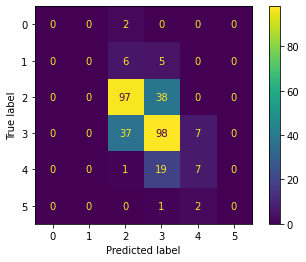

In [113]:
# Realitzem una matriu de confusió arrodonint y_pred
y_pred = LR.predict(X_test)
cm = confusion_matrix(y_test, np.round(y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()

# Calculem la precisió observant els encerts a la matriu.
total = y_test.size
score = ((97+98+7)*100)// total 
score

In [92]:
# Realitzem la predicció amb un arbre de decisió:
DT = DecisionTreeClassifier().fit(X_train, y_train)
DT.score(X_test, y_test)

0.6875

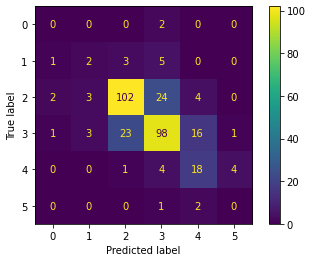

In [93]:
# Realitzem la matriu de confusió
y_pred = DT.predict(X_test)
cm = confusion_matrix(y_test, np.round(y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [104]:
# Analitzem l'importancia de les variables en l'elaboració del model
features = pd.DataFrame(columns = df.columns.drop("quality") )
features.loc[0] = DT.feature_importances_
features 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.070962,0.10881,0.058911,0.088585,0.080098,0.081809,0.090782,0.078239,0.070054,0.100803,0.170945


In [108]:
# Intentem la predicció amb un random forest. 
RFC = RandomForestClassifier().fit(X_train, y_train)
print(RFC.score(X_test, y_test))

0.709375


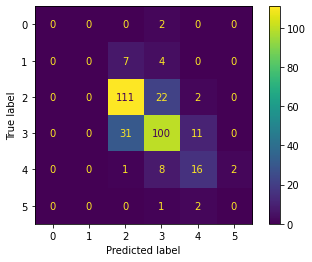

In [109]:
# Realitzem la matriu de confusió
y_pred = RFC.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [105]:
# Analitzem l'importancia de les variables en l'elaboració del model
features = pd.DataFrame(columns = df.columns.drop("quality") )
features.loc[0] = RFC.feature_importances_
features 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.077152,0.106785,0.075251,0.070661,0.078472,0.069912,0.098266,0.093494,0.073574,0.110034,0.1464


In [46]:
# Afinem els hiperparametres del random forest:
parameters = {"n_estimators": (50, 100, 150, 200), 
              "max_depth": range(10, 20)}

clf = GridSearchCV(RandomForestClassifier(), param_grid = parameters, cv=4)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.740625

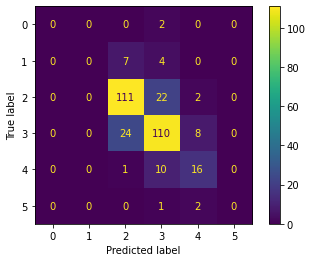

In [57]:
# Realitzem la matriu de confusió
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [107]:
# Analitzem l'importancia de les variables en l'elaboració del model
features = pd.DataFrame(columns = df.columns.drop("quality") )
features.loc[0] = clf.best_estimator_.feature_importances_
features 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.073472,0.107855,0.074345,0.072009,0.077747,0.068269,0.103239,0.092802,0.075907,0.114824,0.139532
